# Activation Function and Error Function

## Regression

### Single target regression

We start by assuming the target variable $t$ that can take any real value to arise from a Gaussian distribution with an $\mathbf{x}$-dependent mean, which is given by the output of the neural network $y(\mathbf{x},\mathbf{w})$, so that the probability of $t$ is given by

$$p(t|\mathbf{x},\mathbf{w}) = \mathcal{N}(t|y(\mathbf{x},\mathbf{w}), \beta^{-1}) \tag{5.12}$$

where $\beta$ is the precision (inverse variance) of the Gaussian noise.

If the training data consists of $N$ independent, identically distributed observations $\mathbf{X} = \{\mathbf{x}_1,\cdots,\mathbf{x}_N\}$ and the corresponding target values $\mathbb{t} = \{t_1,\cdots,t_N\}$. we can construct the corresponding likelihood function

$$p(\mathbb{t}|\mathbf{X},\mathbf{w},\beta) = \prod_{n=1}^N p(t_n|\mathbf{x}_n,\mathbf{w},\beta)$$

Taking the negative likelihood logarithm, we obtain the error function

$$\frac{\beta}{2}\sum_{n=1}^N\{y(\mathbf{x}_n.\mathbf{w})-t_n\}^2-\frac{N}{2}\ln\beta+\frac{N}{2}\ln(2\pi) \tag{5.13}$$

Consider first the determination of $\mathbf{w}$. Maximizing the likelihood function is equivalent to <font color='red'>minimizing the sum-of-squares error function given by</font>

<font color='red'>$$E(\mathbf{w}) = \frac{1}{2}\sum_{n=1}^N\{y(\mathbf{x}_n,\mathbf{w})-t_n\}^2 \tag{5.14}$$</font>

Having found $\mathbf{w}_{ML}$, the value of $\beta$ can be found by minimizing the negative log likelihood to give

$$\frac{1}{\beta_{ML}} = \frac{1}{N}\sum_{n=1}^N\{y(\mathbf{x}_n,\mathbf{w}_{ML})-t_n\}^2 \tag{5.15}$$




### Multiple targets regression
If we have multiple target variables, whose quantities is denoted by $K$, and we assume that they are independent conditional on $\mathbf{x}$ and $\mathbf{w}$ with shared noise precision $\beta$, then the conditional distribution of the target is given by

$$p(\mathbf{t}|\mathbf{x}, \mathbf{w}) = \mathcal{N}(\mathbf{t|\mathbf{y}(\mathbf{x},\mathbf{w}),\beta^{-1}\mathbf{I}}) \tag{5.16}$$

Following the same argument as for a single target variable, we see that the maximum likelihood weights are determined by <font color='red'>minimizing the sum-of-squares error function</font>

<font color='red'>$$E(\mathbf{w}) = \frac{1}{2}\sum_{n=1}^N\|\mathbf{y}(\mathbf{x}_n,\mathbf{w})-\mathbf{t}_n\|^2 \tag{5.11}$$</font>

The noise precision is then given by

$$\frac{1}{\beta_{ML}} = \frac{1}{NK}\sum_{n=1}^N\|\mathbf{y}(\mathbf{x}_n,\mathbf{w}_{ML})-\mathbf{t}_n\|^2 \tag{5.17}$$

In regression problem, the activation function is a linear function given by

<font color='blue'>$$y_k = f(a_k) = a_k$$</font>

Thus the corresponding sum-of-squares error function has the property

<font color='orange'>$$\frac{\partial E}{\partial a_k} = \frac{\partial E}{\partial y_k} = y_k-t_k \tag{5.18}$$</font>

which we shall make use of when discussing error backpropagation in Section 5.3.


## Classification

### Binary classification

The target of binary classification is $0$ for $C_2$ or $1$ for $C_1$, and the output of the neural network $y(\mathbf{x},\mathbf{w})$ is the probbility of assigning the observation $\mathbf{x}$ to class $C_1$ with the restriction $1\leqslant y(\mathbf{x},\mathbf{w})\leqslant 1$. We can therefore intepret $y(\mathbf{x},\mathbf{w})$ as the conditional distribution $p(C_1|\mathbf{x})$, with $p(C_2|\mathbf{x})$ given by $1-y(\mathbf{x},\mathbf{w})$. The conditional distribution of targets given inputs is then a Bernoulli distribution of the form

$$p(t|\mathbf{x},\mathbf{w}) = y(\mathbf{x},\mathbf{w})^t\{1-y(\mathbf{x},\mathbf{w})\}^{1-t} \tag{5.20}$$

Then we use the *cross-entropy* as error function, which leads to faster training for a classification problem.

<font color='red'>$$E(\mathbf{w}) = -\sum_{n=1}^N\{t_n\ln y_n + (1-t_n)\ln(1-y_n)\} \tag{5.21}$$</font>

Binary classification use the logistic sigmoid as activation function.

<font color='blue'>$$y = \sigma(a) = \frac{1}{1+exp(-a)} \tag{5.19}$$</font>




### Multiple targets Binary classification

If we have $K$ separate binary classification to perform within a single observation, then we can use a network having $K$ outputs each of which has a <font color='blue'>logistic sigmoid activation function</font>. Then the conditional distribution of the targets is

$$p(\mathbf{t}|\mathbf{x},\mathbf{w}) = \prod_{k=1}^K y_k(\mathbf{x},\mathbf{w})^{t_k}[1-y_k(\mathbf{x},\mathbf{w})]^{1-t_k} \tag{5.22}$$

The error function is 

<font color='red'>$$E(\mathbf{w}) = -\sum_{n=1}^N\sum_{k=1}^K\{t_{nk}\ln y_{nk}+(1-t_{nk})\ln(1-y_{nk})\} \tag{5.23}$$</font>

The corresponding error function has the property

<font color='orange'>$$
\begin{align*}
\frac{\partial E}{\partial a_{nk}} &= \frac{\partial E}{\partial y_{nk}}\frac{\partial y_{nk}}{\partial a_{nk}}\\
&= -\left(\frac{t_{nk}}{y_{nk}}+\frac{t_{nk}-1}{1-y_{nk}}\right)\cdot y_{nk}(1-y_{nk}) \qquad (4.88)\\
&= y_{nk} - t_{nk} \tag{5.18}
\end{align*}$$</font>



### Multiclass classification

The output of $\mathbf{y}(\mathbf{x},\mathbf{w})$ is a vector with $K$ elements, which denote the conditional probability of $C_k$ represently. Thus the conditional distribution of the targets is

$$p(\mathbf{t}|\mathbf{x},\mathbf{w}) = \prod_{k=1}^K y_{k}(\mathbf{x},\mathbf{w})^{t_{k}}$$

For a $N$ observation training data set, the error function is given by

<font color='red'>$$E(\mathbf{w}) = -\sum_{n=1}^N\sum_{k=1}^K t_{kn}\ln y_{k}(\mathbf{x}_n,\mathbf{w}) \tag{5.24}$$</font>

where the activation function is given by the <font color='blue'>softmax function</font>

<font color='blue'>$$y_k(\mathbf{x},\mathbf{w}) = \frac{exp(a_k(\mathbf{x},\mathbf{w}))}{\sum_j exp(a_j(\mathbf{x},\mathbf{w}))} \tag{5.25}$$</font>


The corresponding error function has the property

<font color='orange'>$$
\begin{align*}
\frac{\partial E}{\partial a_{nj}} &=\frac{\partial \left(-\sum_{m=1}^N\sum_{k=1}^K t_{mk}\ln y_{mk}\right)}{\partial a_{nj}}\\
&=\frac{\partial \left(-\sum_{k=1}^K t_{nk}\ln y_{nk}\right)}{\partial a_{nj}}\\
&= -\sum_{k=1}^K t_{nk}\frac{\partial \ln y_{nk}}{\partial y_{nk}}\frac{\partial y_{nk}}{\partial a_{nj}} \\
&= -\sum_{k=1}^K \frac{t_{nk}}{y_{nk}}\cdot y_{nk}(I_{kj}-y_{nj})\qquad \text{derivation of (4.109)}\\
&= y_{nj} - t_{nj} \tag{5.18}
\end{align*}$$</font>

---------------

# Parameter optimization

Our goal is to find the weight vector $\mathbf{w}$ which minimizes the chosen function $E(\mathbf{w})$.

## Multiple minima

The error function $E(\mathbf{w})$ is a smooth continuous function of $\mathbf{w}$. However, the error function typically has nonlinear denpendence on the weights and bias parameters, and so there will be many points in weight space at which the gradient vanishes. Like we discussed in Section 5.1.1, for a two-layer network with $M$ hidden units, each point in weight space is a menber of a family of $M!2^M$ equivalent points.

Furthermore, there will typically be multiple inequivanent stationary points (where $\nabla E=0$) and in particular multiple inequialent minima. 

There are two kinds of minimas. 
- *Global minimum*, a minimum that corresponds to the smallest value of the error function for any weight vector.
- *Local minima*, any other minima corresponding the higher values of the error function.

<font color='red'>For a successful application of neural networks, it may not be nessary to find the global minimum (and in general it will not be known whether the global minimum has been found) but it may be necessary to compare several local minima in order to find a sufficiently good solution.</font>

## Approach to finding local minima

Because there is clearly no hope of finding an analytical solution to the equation $\nabla E(\mathbf{w}) = 0$ we resort to iterative numerical procedures.

We can firstly choose some initial value $\mathbf{w}^{(0)}$ for the weight vector and then moving through weight space in a succession of step of the form

$$\mathbf{w}^{(\tau+1)} = \mathbf{w}^{(\tau)}+\Delta \mathbf{w}^{(\tau)} \tag{5.27}$$

where 
- $\tau$ labels the iteration step. 
- <font color='red'>$\Delta\mathbf{w}^{(\tau)}$ denotes the weight vector update. Different algorithms involve different choices for $\Delta\mathbf{w}^{(\tau)}$. Many algorithms make use of gradient information and therefore requre that, after each update, the value of $\nabla E(\mathbf{w})$ is evaluated at new weight vector $\mathbf{w}^{(\tau+1)}$.</font>



------------------

# Local quadratic approximation

Consider the Taylor expansion of $E(\mathbf{w})$ around some point $\hat{\mathbf{w}}$ in weight space

$$E(\mathbf{w}) \simeq E(\hat{\mathbf{w}}) + (\mathbf{w}-\hat{\mathbf{w}})\mathbf{b}+\frac{1}{2}(\mathbf{w}-\hat{\mathbf{w}})^T\mathbf{H}(\mathbf{w}-\hat{\mathbf{w}}) \tag{5.28}$$

where cubic and higher terms have been omitted. Here $\mathbf{b}$ is defined to the gradient of $E$ evaluate at $\hat{\mathbf{w}}$

$$\mathbf{b} \equiv \nabla E|_{\mathbf{w}=\hat{\mathbf{w}}} \tag{5.29}$$

and the Hessian matrix $\mathbf{H} = \nabla\nabla E$ has elements

$$(\mathbf{H})_{ij} \equiv \left.\frac{\partial E}{\partial w_i\partial w_j}\right|_{\mathbf{w}=\hat{\mathbf{w}}} \tag{5.30}$$

For points $\mathbf{w}$ that are sufficiently close to $\hat{\mathbf{w}}$, these expressions will give reasonable approximations for the error and its gradient.

Consider the particular case of a local quadratic approximation around a point $\mathbf{w}^{\star}$ that is a minimum of the error function. In this case there is no linear term, because $\nabla E=0$ at $\mathbf{w}^{\star}$, and (5.28) becomes

$$\begin{align*}
E(\mathbf{w}) &= E(\mathbf{w}^\star) + \frac{1}{2}(\mathbf{w}-\mathbf{w}^\star)^T\mathbf{H}(\mathbf{w}-\mathbf{w}^\star) \tag{5.32}\\
&=E(\mathbf{w}^\star)+\frac{1}{2}\left(\sum_j a_j\mathbf{u}_j^T\right) \mathbf{H} \left(\sum_i a_i\mathbf{u}_i\right) \qquad \mathbf{u}_i\ is\ the\ eigenvector\ of\ \mathbf{H} \\
&=E(\mathbf{w}^\star)+\frac{1}{2}\left(\sum_j a_j\mathbf{u}_j^T\right) \left(\sum_i \lambda_i a_i\mathbf{u}_i\right) \qquad \lambda_i\ is\ the\ eigenvalue\ of\ \mathbf{H} \\
&=E(\mathbf{w}^\star)+\frac{1}{2}\sum_j\sum_i \lambda_i a_j a_i\mathbf{u}_j^T \mathbf{u}_i\\
&=E(\mathbf{w}^\star)+\frac{1}{2}\sum_i \lambda_i a_i^2 \qquad The\ eigenvectors\ of\ \mathbf{H}\ are\ orthogonal\ to\ each\ other.
\left\{\begin{array}{ll}\mathbf{u}_j^T\mathbf{u}_i = 1 & if\ i=j\\
\mathbf{u}_j^T\mathbf{u}_i = 0 & if\ i\neq j\end{array}\right. \tag{5.36}
\end{align*}$$

The matrix $\mathbf{H}$ is said to be *possitive definite* if, and only if, all of its eigenvalues are positive. And if this condition is satisfied, the error function $E(\mathbf{w})$ will have a minimum at the point $\mathbf{w}^{\star}$.

The following figure is an example of two-dimensional vector.

*$\mathbf{u_i}$ in the figure is just showing the direction.*





[0.44511389 5.05488611]
[[-0.93788501 -0.34694625]
 [ 0.34694625 -0.93788501]]


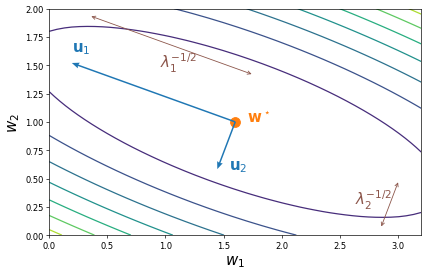

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA

MU = np.array([1.6, 1.0])
H = np.array([[1.0, 1.5],
              [1.5, 4.5]])
LAMBDA, UT = LA.eig(H)
print(LAMBDA)
print(UT)

NX = 50
NY = 50
x,y = np.mgrid[0:3.2:NX*1j, 0:2:NY*1j]

def compute_error(x, y):
    X = np.reshape(x, (NX*NY,1))
    Y = np.reshape(y, (NX*NY,1))
    XY = np.c_[X,Y]
    Z = 0.5 * np.sum((XY-MU) @ H * (XY-MU), axis=1)
    z = np.reshape(Z, (NX, NY))
    return z

def main():
    fig = plt.figure(figsize=(8,5), dpi=60)
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel(r"$w_1$", fontsize=18)
    ax.set_ylabel(r"$w_2$", fontsize=18)

    UM = UT.T
    z = compute_error(x, y)
    ax.contour(x, y, z)
    
    ax.scatter(MU[0], MU[1], color='C1', s=140, marker='o')
    ax.text(x=MU[0]+0.1, y=MU[1], s=r"$\mathbf{w}^\star$", fontsize=18, color='C1')


    LenX, LenY = np.array((UM[0]*LAMBDA[0]**(-.5),UM[1]*LAMBDA[1]**(-.5))).T
    StartX = MU[0]
    StartY = MU[1]
    ax.quiver(StartX, StartY, LenX, LenY, color='C0', angles='xy', scale_units='xy', scale=1, width=.004, headwidth=4)
    u1x = (StartX+LenX)[0]
    u1y = (StartY+LenY)[0]+0.1
    u2x = (StartX+LenX)[1]+0.1
    u2y = (StartY+LenY)[1]
    ax.text(x=u1x, y=u1y, s=r"$\mathbf{u}_1$", fontsize=18, color='C0')
    ax.text(x=u2x, y=u2y, s=r"$\mathbf{u}_2$", fontsize=18, color='C0')

    x1 = MU[0]-LenX[0]
    y1 = MU[1]-LenY[0]
    x2 = x1 + LenX[1]
    y2 = y1 + LenY[1]
    plt.annotate(
        '', xy=(x2, y2), xycoords='data',
        xytext=(x1, y1), textcoords='data',
        arrowprops={'arrowstyle': '<->', 'color':'C5'})
    l1x = (x1+x2)/2-0.3
    l1y = (y1+y2)/2
    ax.text(x=l1x, y=l1y, s=r"$\lambda_2^{-1/2}$", fontsize=18, color='C5')

    x3 = MU[0]-LenX[1]
    y3 = MU[1]-LenY[1]
    x4 = x3 + LenX[0]
    y4 = y3 + LenY[0]
    plt.annotate(
        '', xy=(x3, y3), xycoords='data',
        xytext=(x4, y4), textcoords='data',
        arrowprops={'arrowstyle': '<->', 'color':'C5'})
    l2x = (x3+x4)/2-0.1
    l2y = (y3+y4)/2-0.2
    ax.text(x=l2x, y=l2y, s=r"$\lambda_1^{-1/2}$", fontsize=18, color='C5')

    plt.show()
    
if __name__=="__main__":
    main()

--------------

# Use of gradient information

- From (5.28), we see that there are $\underbrace{W(W+1)/2}_{Hessian}+\underbrace{\quad W\quad}_{gradient}$ independent elements, where $W$ is the dimensonality of $\mathbf{w}$. Thus we would expect to have perform $O(W^2)$ function evaluations, each of which would require $O(W)$ steps for multiplication.

- Now compare this with an algorithm that makes use of the gradient information.Because each evaluation of $\nabla E$ brings $W$ items of information, there would be $O(W)$ evaluations for finding gradient. As we shall see, by using error back propagation, each such evaluation takes only $O(W)$ steps.

The total computation effort of the first approach is $O(W^3)$, whereas that of the second approach is $O(W^2)$. For this reason, the use of gradient information forms the basis of pratical algorithms for training neural networks.

-----------------

# Gradient descent optimization

## Gradient descent

Here is a simplest approach to using gradient information to update weight vector.

$$\mathbf{w}^{(\tau+1)} = \mathbf{w}^{(\tau)}-\eta\nabla E(\mathbf{w}^{(\tau)}) \tag{5.41}$$

where the parameter $\eta>0$ is known as the *learning rate*. And this approach is called *gradient descent*.

Note that the error function is defined with respect to a training set, and so each step requires that the entire training set be processed in order to evaluata $\nabla E$. Techniques that use the whole data set once are called *batch* methods.

## Stochastic gradient descent

Error functions based on maximum likelihood for a set of independent observations comprise a sum of terms, one for each data point

$$E(\mathbf{w}) = \sum_{n=1}^N E_n(\mathbf{w}) \tag{5.42}$$

Stochastic gradient descent makes an update to the weight vector based on one data point at a time, so that

$$\mathbf{w}^{(\tau+1)} = \mathbf{w}^{(\tau)}-\eta\nabla E_n(\mathbf{w}^{(\tau)}) \tag{5.43}$$

There are following advantages of this methods compared to batch methods.
- <font color='red'>This sequential methods handle redundancy in the data much more efficiently.</font> To see this, consider an extreme example in which we take a data set and double its size by duplicating every data point. Note that this simply multiplies the error function by factor of $2$ and so is equivalent to using the origin error function. Batch methods will require double the computational effort to evaluate the batch error function gradient, where as this methods will be unaffected.
- <font color='red'>Another property is the possibility of escaping from local minima. Since a stationary point with respect to the error function for the whole data set will generally not be a stationary point for each data point individually.</font>